In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from datetime import datetime
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
import re
!pip install emoji
import emoji
import dateutil
raw_tweets = pd.read_csv('../datasets/elon_musk_tweets.csv')
raw_tweets.head()

[nltk_data] Downloading package vader_lexicon to C:\Users\Juan
[nltk_data]     Diego\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1544379368478212100,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240855,115,13503,True,2022-07-05 17:55:09+00:00,@BillyM2k I find the gold toe sock – inevitabl...,NaN,Twitter for iPhone,335,6542,False
1,1544377493263720450,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:47:42+00:00,"Sock Con, the conference for socks",NaN,Twitter for iPhone,1451,30753,False
2,1544377130590552064,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:46:15+00:00,Always something new for the magazine cover an...,NaN,Twitter for iPhone,1284,28610,False
3,1544375575724400645,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:40:05+00:00,@ExplainThisBob This guy gets it,NaN,Twitter for iPhone,131,3640,False
4,1544375148605853699,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:38:23+00:00,Sock tech is so advanced that you can get pret...,NaN,Twitter for iPhone,1191,23790,False


In [2]:
raw_tweets['date'] = pd.to_datetime(raw_tweets['date'])
raw_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5904 entries, 0 to 5903
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id                5904 non-null   int64              
 1   user_name         5904 non-null   object             
 2   user_location     1050 non-null   object             
 3   user_description  1422 non-null   object             
 4   user_created      5904 non-null   object             
 5   user_followers    5904 non-null   int64              
 6   user_friends      5904 non-null   int64              
 7   user_favourites   5904 non-null   int64              
 8   user_verified     5904 non-null   bool               
 9   date              5904 non-null   datetime64[ns, UTC]
 10  text              5904 non-null   object             
 11  hashtags          2 non-null      object             
 12  source            5904 non-null   object             
 13  ret

Se cambia el formato de la columna fecha a datetime

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
tokenizer = TweetTokenizer()
lemmatizer = WordNetLemmatizer()

def limpiar_texto(texto):
    texto = re.sub(r"http\S+", "URL", texto)
    texto = re.sub(r"@\S+", "MENTION", texto)
    texto = re.sub(r"#\S+", "HASHTAG", texto)
    texto = emoji.demojize(texto)
    texto = texto.lower()
    
    tokens = tokenizer.tokenize(texto)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    
    return " ".join(tokens)

raw_tweets["texto_limpio"] = raw_tweets["text"].apply(limpiar_texto)

[nltk_data] Downloading package stopwords to C:\Users\Juan
[nltk_data]     Diego\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Juan
[nltk_data]     Diego\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Se limpia el texto del tweet retirando hashtags, menciones, signos de puntuación, pronombres y conviertiendo todo a minusculas para homogeneizar el texto

In [4]:
raw_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5904 entries, 0 to 5903
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id                5904 non-null   int64              
 1   user_name         5904 non-null   object             
 2   user_location     1050 non-null   object             
 3   user_description  1422 non-null   object             
 4   user_created      5904 non-null   object             
 5   user_followers    5904 non-null   int64              
 6   user_friends      5904 non-null   int64              
 7   user_favourites   5904 non-null   int64              
 8   user_verified     5904 non-null   bool               
 9   date              5904 non-null   datetime64[ns, UTC]
 10  text              5904 non-null   object             
 11  hashtags          2 non-null      object             
 12  source            5904 non-null   object             
 13  ret

In [5]:
raw_tweets['datetime'] = pd.to_datetime(raw_tweets['date'])  # Ensure datetime column is in datetime format
raw_tweets['hour'] = raw_tweets['datetime'].apply(lambda x: x.hour)
raw_tweets['date'] = raw_tweets['datetime'].apply(lambda x: x.date())
raw_tweets['month'] = raw_tweets['datetime'].apply(lambda x: x.month)
raw_tweets['year'] = raw_tweets['datetime'].apply(lambda x: x.year)
raw_tweets['day'] = raw_tweets['datetime'].apply(lambda x: x.day)

In [6]:
raw_tweets['year'].value_counts()

year
2023    3377
2022    2527
Name: count, dtype: int64

In [7]:
SIA = SentimentIntensityAnalyzer()
raw_tweets['polarity_score'] = raw_tweets['texto_limpio'].apply(lambda text: SIA.polarity_scores(text) )
raw_tweets['compound'] = raw_tweets['polarity_score'].apply(lambda dict: dict['compound'])

SIA = SentimentIntensityAnalyzer()
raw_tweets['polarity_score'] = raw_tweets['text'].apply(lambda text: SIA.polarity_scores(text) )
raw_tweets['compound_original'] = raw_tweets['polarity_score'].apply(lambda dict: dict['compound'])

In [8]:
def categorize_sentiment(compound_score):
    if compound_score <= -0.6:
        return 'Negative'
    elif compound_score <= -0.2:
        return 'Somewhat Negative'
    elif compound_score <= 0.2:
        return 'Neutral'
    elif compound_score <= 0.6:
        return 'Somewhat Positive'
    else:
        return 'Positive'

In [9]:
print(raw_tweets.columns)

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet', 'texto_limpio', 'datetime', 'hour', 'month', 'year',
       'day', 'polarity_score', 'compound', 'compound_original'],
      dtype='object')


In [10]:
raw_tweets['Sentiment_Category'] = raw_tweets['compound'].apply(categorize_sentiment)
raw_tweets['Sentiment_Category_Original'] = raw_tweets['compound_original'].apply(categorize_sentiment)

In [11]:
print(raw_tweets.columns)

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet', 'texto_limpio', 'datetime', 'hour', 'month', 'year',
       'day', 'polarity_score', 'compound', 'compound_original',
       'Sentiment_Category', 'Sentiment_Category_Original'],
      dtype='object')


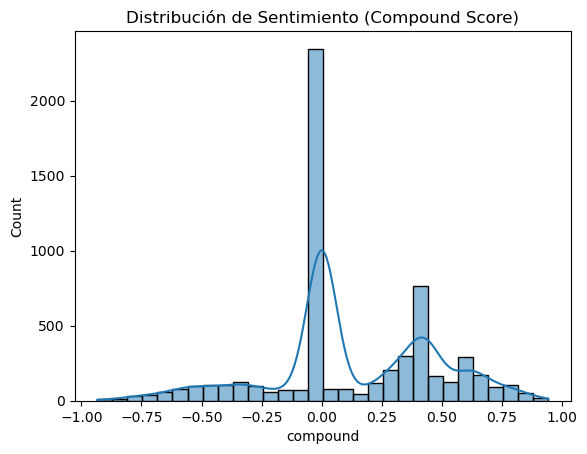

In [12]:
import seaborn as sns

sns.histplot(raw_tweets['compound'], bins=30, kde=True)
plt.title("Distribución de Sentimiento (Compound Score)")
plt.show()



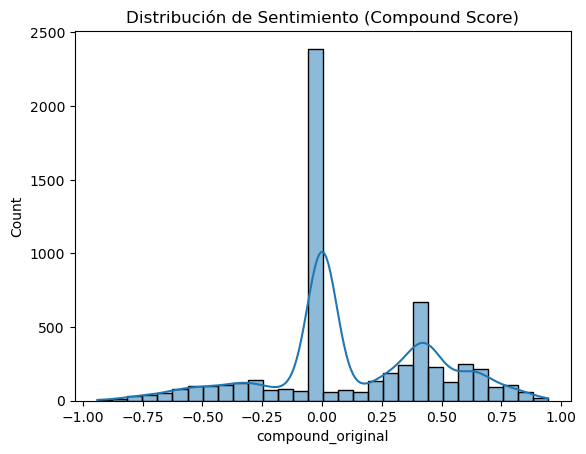

In [13]:
sns.histplot(raw_tweets['compound_original'], bins=30, kde=True)
plt.title("Distribución de Sentimiento (Compound Score)")
plt.show()

<Axes: title={'center': 'Sentimiento Promedio por Día'}, xlabel='date'>

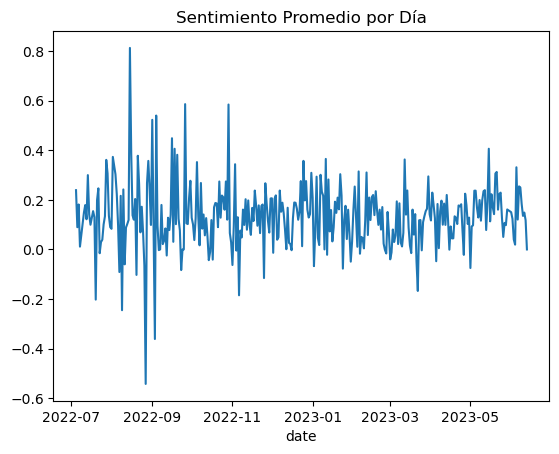

In [14]:
sentimiento_por_dia = raw_tweets.groupby('date')['compound'].mean()
sentimiento_por_dia.plot(kind='line', title='Sentimiento Promedio por Día')


In [18]:
fecha_max_sent = sentimiento_por_dia.idxmax()
fecha_min_sent = sentimiento_por_dia.idxmin()
tweets_dia_max = raw_tweets[raw_tweets['date'] == fecha_max_sent]
tweets_dia_min = raw_tweets[raw_tweets['date'] == fecha_min_sent]
print(f" Tweets del día con sentimiento MÁS ALTO: {fecha_max_sent}\n")
print(tweets_dia_max[['text', 'compound']].sort_values(by='compound', ascending=False).head(5))

print("\n Tweets del día con sentimiento MÁS BAJO: {fecha_min_sent}\n")
print(tweets_dia_min[['text', 'compound']].sort_values(by='compound').head(5))

 Tweets del día con sentimiento MÁS ALTO: 2022-08-15

                                                  text  compound
313  @teslaownersSV Yes. Tesla Autopilot/AI team is...    0.8126

 Tweets del día con sentimiento MÁS BAJO: {fecha_min_sent}

                                                  text  compound
383  @RenataKonkoly The caffeine one is most troubling   -0.5423


C:\Users\Juan Diego\AppData\Local\Temp\ipykernel_12232\425855647.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pos.values, y=top_pos.index, ax=axes[0], palette='Greens_d')
C:\Users\Juan Diego\AppData\Local\Temp\ipykernel_12232\425855647.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neg.values, y=top_neg.index, ax=axes[1], palette='Reds_d')


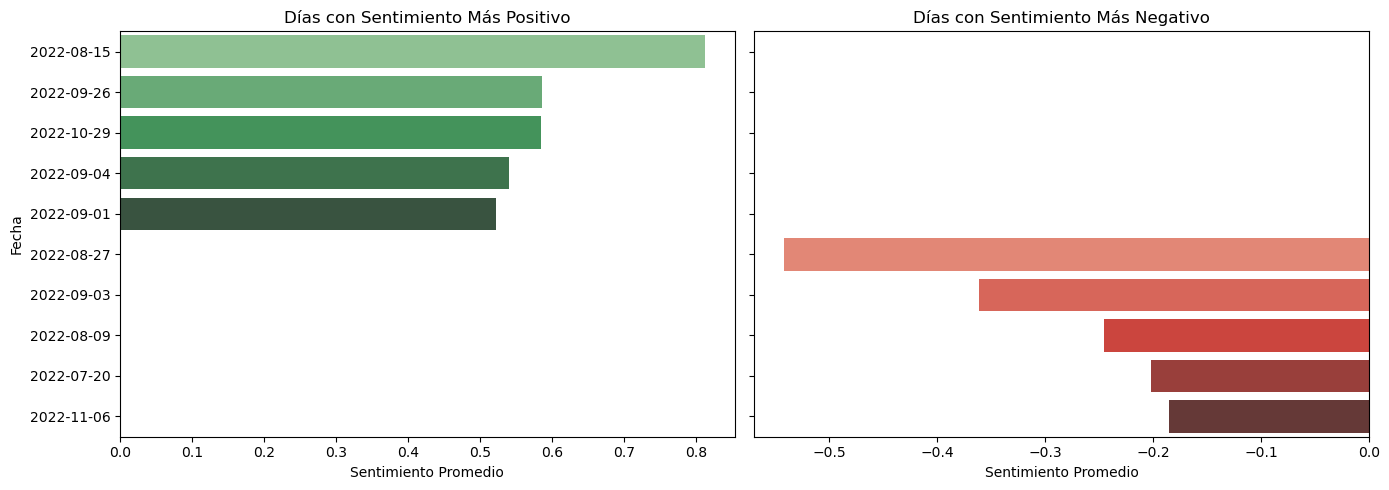

In [21]:
top_pos = sentimiento_por_dia.sort_values(ascending=False).head(5)
top_neg = sentimiento_por_dia.sort_values(ascending=True).head(5)

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

sns.barplot(x=top_pos.values, y=top_pos.index, ax=axes[0], palette='Greens_d')
axes[0].set_title("Días con Sentimiento Más Positivo")
axes[0].set_xlabel("Sentimiento Promedio")
axes[0].set_ylabel("Fecha")

sns.barplot(x=top_neg.values, y=top_neg.index, ax=axes[1], palette='Reds_d')
axes[1].set_title("Días con Sentimiento Más Negativo")
axes[1].set_xlabel("Sentimiento Promedio")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

<Axes: xlabel='Sentiment_Category', ylabel='count'>

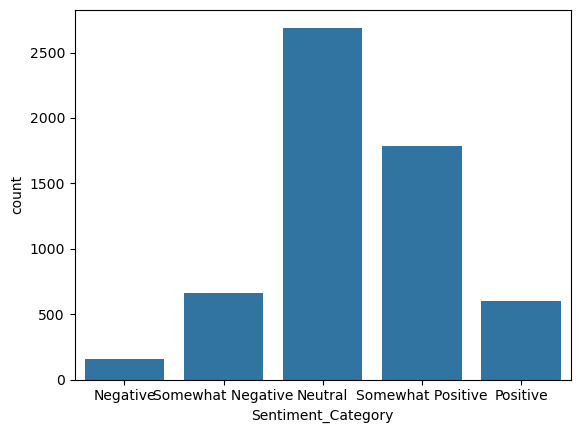

In [15]:
import seaborn as sns

sns.countplot(x='Sentiment_Category', data=raw_tweets, order=['Negative', 'Somewhat Negative', 'Neutral', 'Somewhat Positive', 'Positive'])


In [16]:
clean_tweets = raw_tweets[['date', 'hour', 'month','day', 'texto_limpio','text', 'user_followers', 'user_friends','retweets','favorites','Sentiment Category', 'compound']].copy()
clean_tweets.head()

KeyError: "['Sentiment Category'] not in index"

In [ ]:
clean_tweets.to_csv('../datasets/clean_tweets.csv', index=False)